In [ ]:
Quick Data Cleaning¶
Convert numeric columns (budget, gross, title_year, release_year, imdb_score)
Trim whitespace from titles
Standardize Netflix listed_in column to genres for parity

In [ ]:
# Importing the Data and Loading the Data


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# File paths (use your actual folder)
imdb_path = r"E:\Project\movie_metadata.csv"
netflix_path = r"E:\Project\netflix_titles.csv"

# Load datasets
movie_df = pd.read_csv(imdb_path)
netflix_df = pd.read_csv(netflix_path)

print("IMDB shape:", movie_df.shape)
print("Netflix shape:", netflix_df.shape)

# Quick preview
display(movie_df.head())
display(netflix_df.head())


IMDB shape: (5043, 28)
Netflix shape: (8807, 12)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2) Quick Data Cleaning
- Convert numeric columns (budget, gross, title_year, release_year, imdb_score)
- Trim whitespace from titles
- Standardize Netflix `listed_in` column to `genres` for parity

In [ ]:
#Quick Data Cleaning¶
#Convert numeric columns (budget, gross, title_year, release_year, imdb_score)
#Trim whitespace from titles
#Standardize Netflix listed_in column to genres for parity

In [12]:


movie_df = movie_df.copy()
netflix_df = netflix_df.copy()

# Clean IMDB numeric columns
for col in ['budget','gross','title_year','imdb_score']:
    if col in movie_df.columns:
        movie_df[col] = pd.to_numeric(movie_df[col], errors='coerce')

# Trim titles
if 'movie_title' in movie_df.columns:
    movie_df['movie_title'] = movie_df['movie_title'].astype(str).str.strip()

# Clean Netflix numeric columns and standardize genres column name
if 'release_year' in netflix_df.columns:
    netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce')

# Ensure a common genre column name for later steps
if 'listed_in' in netflix_df.columns:
    netflix_df = netflix_df.rename(columns={'listed_in': 'genres', 'title': 'movie_title'})

print('After cleaning: IMDB shape:', movie_df.shape, 'Netflix shape:', netflix_df.shape)
print('\nMissing values (IMDB):\n', movie_df.isnull().sum().sort_values().head(10))
print('\nMissing values (Netflix):\n', netflix_df.isnull().sum().sort_values().head(10))



After cleaning: IMDB shape: (5043, 28) Netflix shape: (8807, 12)

Missing values (IMDB):
 num_voted_users              0
cast_total_facebook_likes    0
movie_title                  0
genres                       0
imdb_score                   0
movie_facebook_likes         0
movie_imdb_link              0
country                      5
actor_1_facebook_likes       7
actor_1_name                 7
dtype: int64

Missing values (Netflix):
 show_id           0
type              0
movie_title       0
release_year      0
genres            0
description       0
duration          3
rating            4
date_added       10
cast            825
dtype: int64


In [ ]:
# Trends in Movie Production Over Time

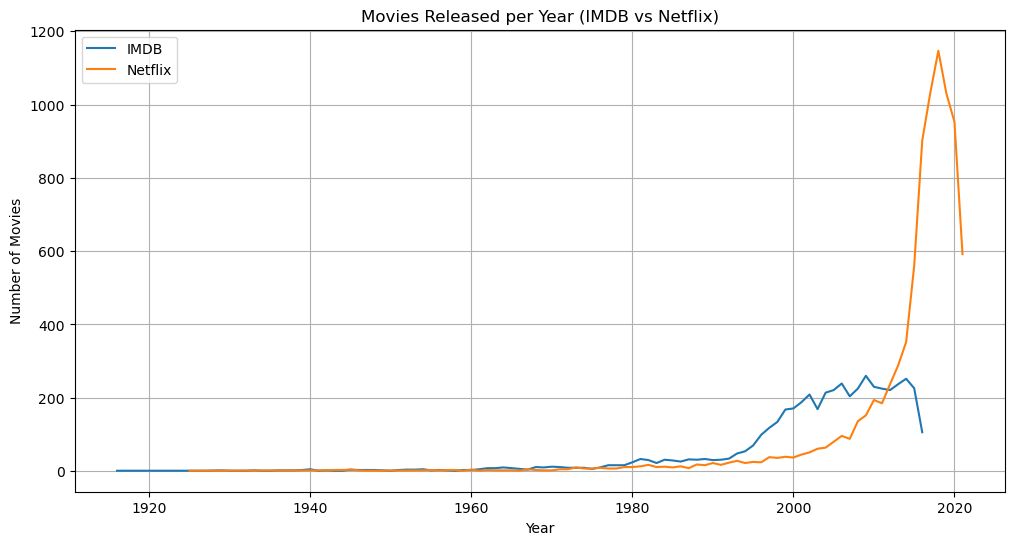

In [14]:


imdb_counts = movie_df['title_year'].dropna().astype(int).value_counts().sort_index()

netflix_counts = netflix_df['release_year'].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(imdb_counts.index, imdb_counts.values, label='IMDB')
plt.plot(netflix_counts.index, netflix_counts.values, label='Netflix')
plt.title('Movies Released per Year (IMDB vs Netflix)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#Most Popular Genres

Top IMDB genres:
 genres
Drama        2594
Comedy       1872
Thriller     1411
Action       1153
Romance      1107
Adventure     923
Crime         889
Sci-Fi        616
Fantasy       610
Horror        565
Family        546
Mystery       500
Biography     293
Animation     242
Music         214
Name: count, dtype: int64


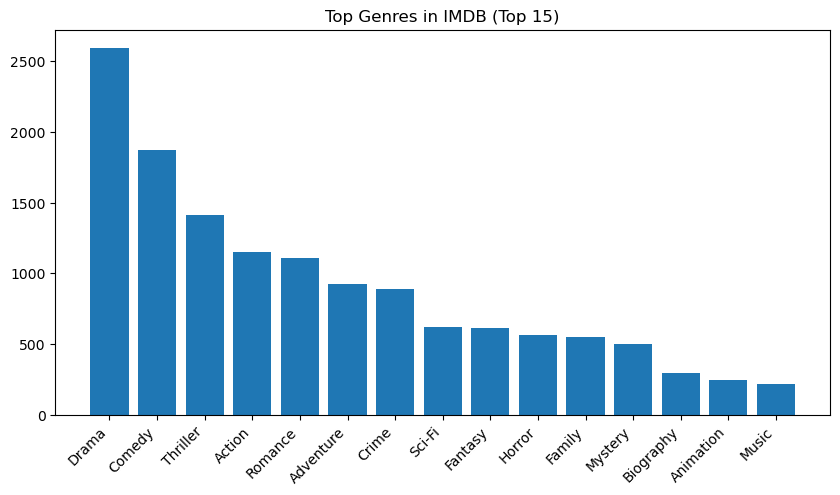


Top Netflix genres:
 genres
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64


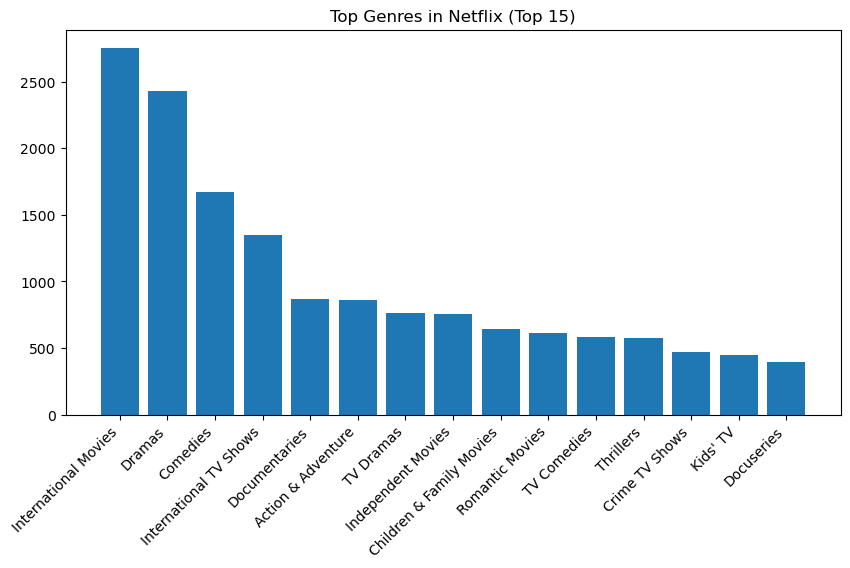

In [15]:
# Helper to explode genres (handles '|' and ',' separators)
def explode_genres(series):
    s = series.dropna().astype(str)
    # detect separator heuristically
    if s.str.contains('\\|').any():
        sep = '\\|'
    else:
        sep = ','
    exploded = s.str.split(sep).explode().str.strip()
    return exploded[exploded != '']

# IMDB genres
imdb_genres = explode_genres(movie_df['genres'])
top_imdb_genres = imdb_genres.value_counts().head(15)
print('Top IMDB genres:\n', top_imdb_genres.head(15))

plt.figure(figsize=(10,5))
plt.bar(top_imdb_genres.index, top_imdb_genres.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top Genres in IMDB (Top 15)')
plt.show()

# Netflix genres
netflix_genres = explode_genres(netflix_df['genres'])
top_netflix_genres = netflix_genres.value_counts().head(15)
print('\nTop Netflix genres:\n', top_netflix_genres.head(15))

plt.figure(figsize=(10,5))
plt.bar(top_netflix_genres.index, top_netflix_genres.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top Genres in Netflix (Top 15)')
plt.show()


In [ ]:
#Correlation between Budget & Revenue (IMDB)

,director_name,count,avg_score
2061,Sergio Leone,4,8.475000
373,Christopher Nolan,8,8.425000
1764,Pete Docter,3,8.233333
841,Hayao Miyazaki,4,8.225000
1826,Quentin Tarantino,8,8.200000
1615,Milos Forman,3,8.133333
698,Frank Capra,5,8.060000
2280,Tony Kaye,3,8.033333
517,David Lean,4,8.000000
2104,Stanley Kubrick,7,8.000000


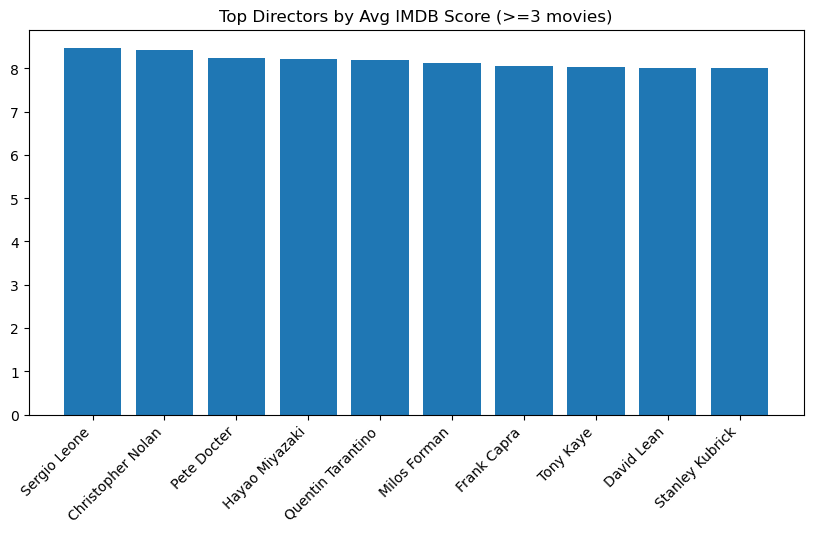

In [19]:
# Directors: average imdb_score (min 3 movies)
dir_df = movie_df.dropna(subset=['director_name', 'imdb_score'])
director_stats = dir_df.groupby('director_name').agg(count=('imdb_score', 'size'),
                                                     avg_score=('imdb_score', 'mean')).reset_index()
director_stats = director_stats[director_stats['count'] >= 3].sort_values('avg_score', ascending=False)

display(director_stats.head(15))

plt.figure(figsize=(10, 5))
top_dirs = director_stats.head(10)
plt.bar(top_dirs['director_name'], top_dirs['avg_score'])
plt.xticks(rotation=45, ha='right')
plt.title('Top Directors by Avg IMDB Score (>=3 movies)')
plt.show()

,actor,count,avg_score
1125,Claude Rains,3,8.400000
3315,Kenny Baker,4,8.225000
5825,Tobias Menzies,3,8.166667
6131,William Holden,3,8.100000
5770,Thomas Mitchell,4,8.075000
4257,Min-sik Choi,3,8.066667
3623,Lionel Barrymore,3,8.033333
2409,Jack Hawkins,3,7.966667
3755,Mackenzie Foy,4,7.950000
4509,Oliver Reed,4,7.925000


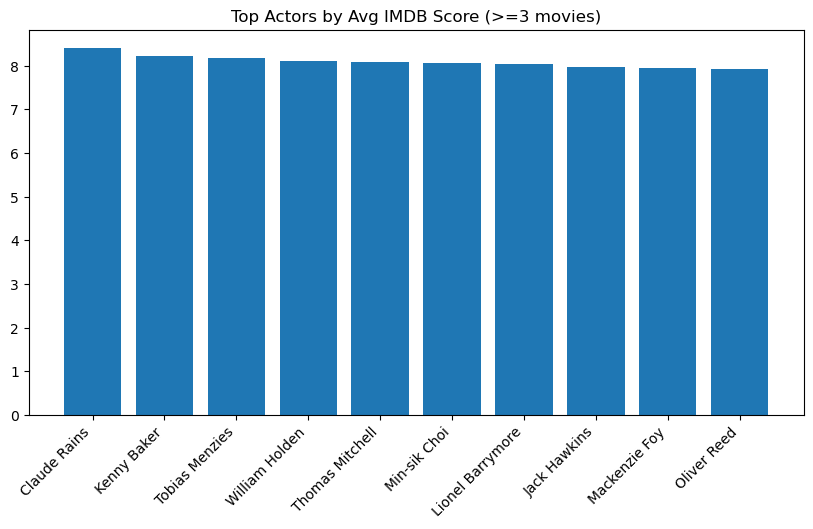

In [20]:
# Actors: melt actor_1/2/3 then compute stats (min 3 movies)
actors_cols = [c for c in ['actor_1_name', 'actor_2_name', 'actor_3_name'] if c in movie_df.columns]
actors_df = movie_df[actors_cols + ['imdb_score']].copy()
actors_long = actors_df.melt(id_vars='imdb_score', value_name='actor')[['actor', 'imdb_score']].dropna(subset=['actor'])
actor_stats = actors_long.groupby('actor').agg(count=('imdb_score', 'size'), avg_score=('imdb_score', 'mean')).reset_index()
actor_stats = actor_stats[actor_stats['count'] >= 3].sort_values('avg_score', ascending=False)

display(actor_stats.head(15))

plt.figure(figsize=(10, 5))
top_actors = actor_stats.head(10)
plt.bar(top_actors['actor'], top_actors['avg_score'])
plt.xticks(rotation=45, ha='right')
plt.title('Top Actors by Avg IMDB Score (>=3 movies)')
plt.show()

In [ ]:
# Correlation between Budget & Revenue (IMDB)

Number of movies with budget & gross > 0: 3891
Pearson correlation (budget vs gross): 0.10217945351303359


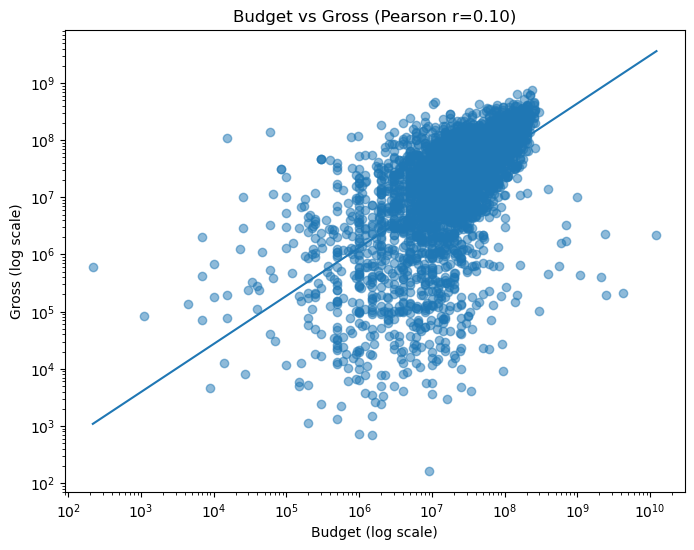

In [21]:
# Prepare budget & gross for correlation
bg = movie_df.copy()
if 'budget' in bg.columns and 'gross' in bg.columns:
    bg['budget'] = pd.to_numeric(bg['budget'], errors='coerce')
    bg['gross'] = pd.to_numeric(bg['gross'], errors='coerce')

    bg_clean = bg[(bg['budget'].notnull()) & (bg['gross'].notnull()) & (bg['budget'] > 0) & (bg['gross'] > 0)].copy()
    print('Number of movies with budget & gross > 0:', len(bg_clean))

    if len(bg_clean) > 0:
        corr = bg_clean['budget'].corr(bg_clean['gross'])
        print('Pearson correlation (budget vs gross):', corr)

        plt.figure(figsize=(8, 6))
        plt.scatter(bg_clean['budget'], bg_clean['gross'], alpha=0.5)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Budget (log scale)')
        plt.ylabel('Gross (log scale)')
        plt.title(f'Budget vs Gross (Pearson r={corr:.2f})')

        # Fit a regression line in log space
        xlog = np.log10(bg_clean['budget'])
        ylog = np.log10(bg_clean['gross'])
        m, b = np.polyfit(xlog, ylog, 1)
        xs = np.linspace(xlog.min(), xlog.max(), 100)
        ys = m * xs + b
        plt.plot(10**xs, 10**ys)
        plt.show()
    else:
        print('Not enough data points with valid budget and gross to compute correlation.')
else:
    print('Budget or gross columns are missing in IMDB dataset.')

In [ ]:
# Patterns in Ratings¶
#IMDB: distribution of imdb_score
#Netflix: frequency of content rating categories

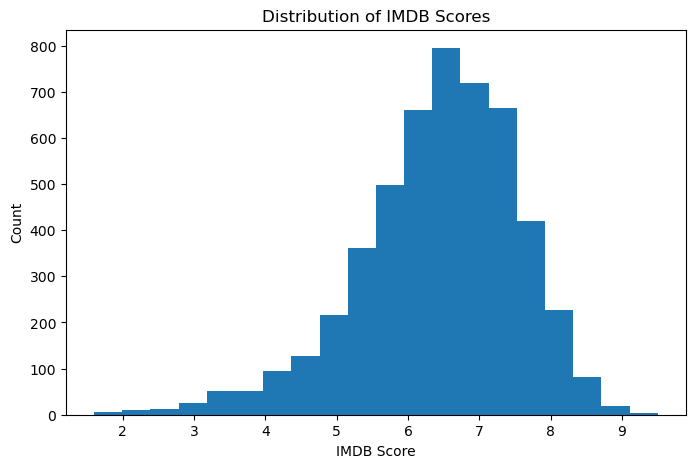

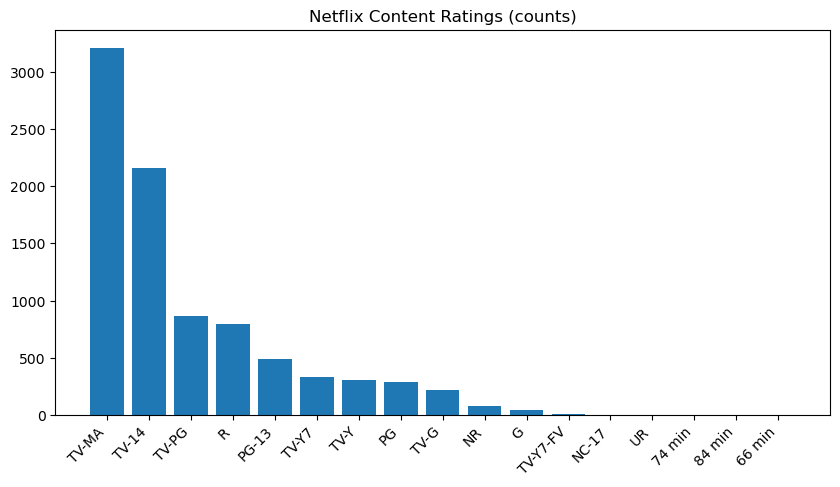

In [22]:
# IMDB score distribution
plt.figure(figsize=(8, 5))
plt.hist(movie_df['imdb_score'].dropna(), bins=20)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Count')
plt.show()

# Netflix rating counts (e.g., TV-MA, R, etc.)
if 'rating' in netflix_df.columns:
    rating_counts = netflix_df['rating'].value_counts().dropna()
    plt.figure(figsize=(10, 5))
    plt.bar(rating_counts.index, rating_counts.values)
    plt.xticks(rotation=45, ha='right')
    plt.title('Netflix Content Ratings (counts)')
    plt.show()
else:
    print('No rating column found in Netflix dataset.')

In [ ]:
#8) Save cleaned / summary tables
#The notebook will export a cleaned Excel workbook containing:

#raw IMDB & Netflix sheets
#top genres
#top directors & actors

In [28]:
# Prepare summary tables for export
summary_imdb_genres = top_imdb_genres.rename_axis('genre').reset_index(name='count') if 'top_imdb_genres' in globals() else movie_df['genres'].dropna().astype(str).str.split('|').explode().str.strip().value_counts().head(15).rename_axis('genre').reset_index(name='count')
summary_netflix_genres = top_netflix_genres.rename_axis('genre').reset_index(name='count') if 'top_netflix_genres' in globals() else netflix_df['genres'].dropna().astype(str).str.split(',').explode().str.strip().value_counts().head(15).rename_axis('genre').reset_index(name='count')

# director_stats and actor_stats are created earlier in the notebook cells; guard if they don't exist
try:
    ds = director_stats.copy()
except NameError:
    ds = pd.DataFrame()

try:
    as_ = actor_stats.copy()
except NameError:
    as_ = pd.DataFrame()

# Export to Excel file
out_xlsx = "movies_analysis_cleaned.xlsx"
with pd.ExcelWriter(out_xlsx) as writer:
    movie_df.to_excel(writer, sheet_name='IMDB_raw', index=False)
    netflix_df.to_excel(writer, sheet_name='Netflix_raw', index=False)
    summary_imdb_genres.to_excel(writer, sheet_name='Top_IMDB_Genres', index=False)
    summary_netflix_genres.to_excel(writer, sheet_name='Top_Netflix_Genres', index=False)
    if not ds.empty:
        ds.to_excel(writer, sheet_name='Top_Directors', index=False)
    if not as_.empty:
        as_.to_excel(writer, sheet_name='Top_Actors', index=False)

print('Saved cleaned/summary Excel to:', out_xlsx)

Saved cleaned/summary Excel to: movies_analysis_cleaned.xlsx


## 9) Next steps / extensions
- Create time-series forecasting for yearly production (ARIMA / Prophet)
- Do topic modeling on `plot_keywords` or Netflix `description`
- Build an interactive dashboard using Plotly Dash / Streamlit / Power BI

---

*End of notebook.*